In [67]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
df = '/kaggle/input/craigslist-carstrucks-data'
files = os.listdir(df)
print(files)

['vehicles.csv']


In [5]:
csv_file = 'vehicles.csv'

In [7]:
file_path = os.path.join(df, csv_file)

In [87]:
df = pd.read_csv(file_path)
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [88]:
df.shape

(426880, 26)

In [89]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [93]:
df['year'] = df['year'].fillna(df['year'].mean())

In [94]:
df['manufacturer'] = df['manufacturer'].fillna(df['manufacturer'].mode()[0])

In [95]:
df['model'] = df['model'].fillna('unknown')

In [97]:
numeric_columns = ['year', 'odometer', 'lat', 'long']
for column in numeric_columns:
    df[column] = df[column].fillna(df[column].mean())

In [98]:
categorical_columns = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color']
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

In [99]:
df['description'] = df['description'].fillna('No description')
df['county'] = df['county'].fillna('Unknown')
df['image_url'] = df['image_url'].fillna('No image')
df['posting_date'] = df['posting_date'].fillna('Unknown')

In [101]:
df.isnull().sum()

id              0
url             0
region          0
region_url      0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
image_url       0
description     0
county          0
state           0
lat             0
long            0
posting_date    0
dtype: int64

In [102]:
print(df)

                id                                                url  \
0       7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1       7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2       7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3       7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4       7210384030  https://greensboro.craigslist.org/cto/d/trinit...   
...            ...                                                ...   
426875  7301591192  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426876  7301591187  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426877  7301591147  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426878  7301591140  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426879  7301591129  https://wyoming.craigslist.org/ctd/d/atlanta-2...   

                        region                         region_url  price  \
0                     prescott    https://presc

In [103]:
for col in df.columns:
    print( col,':', df[col].nunique())
    print(df[col].value_counts().nlargest(5))
    print('\n' + '*' * 20 + '\n')

id : 426880
id
7222695916    1
7313139418    1
7313423023    1
7313423324    1
7313424533    1
Name: count, dtype: int64

********************

url : 426880
url
https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html            1
https://nh.craigslist.org/cto/d/troy-1998-dodge-ram-59-cummins/7313139418.html             1
https://nh.craigslist.org/ctd/d/north-hampton-2012-hyundai-sante-fe-se/7313423023.html     1
https://nh.craigslist.org/ctd/d/derry-2008-chrysler-sebring-limited-all/7313423324.html    1
https://nh.craigslist.org/ctd/d/derry-2002-toyota-camry-low-miles/7313424533.html          1
Name: count, dtype: int64

********************

region : 404
region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
Name: count, dtype: int64

********************

region_url : 413
region_url
https://spokane.craigslist.org    2988
https://eugene.craigslist.org

In [104]:
df.describe()

,id,price,year,odometer,lat,long
count,4.268800e+05,4.268800e+05,426880.000000,4.268800e+05,426880.000000,426880.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.438769,2.127764e+05,5.796551,18.224040
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.813000e+04,34.757016,-111.907973
50%,7.312621e+09,1.395000e+04,2013.000000,8.660000e+04,39.064410,-89.028197
75%,7.315254e+09,2.648575e+04,2017.000000,1.330000e+05,42.350000,-81.030000
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,82.390818,173.885502


In [105]:
df.describe(include='object')

,url,region,region_url,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,posting_date
count,426880,426880,426880,426880,426880,426880,426880,426880,426880,426880,426880,426880,426880,426880,426880,426880,426880,426880,426880,426880
unique,426880,404,413,42,29667,6,8,5,6,3,118264,3,4,13,12,241900,360912,1,51,381537
top,https://prescott.craigslist.org/cto/d/prescott...,columbus,https://spokane.craigslist.org,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,Unknown,ca,Unknown
freq,1,3608,2988,88631,8009,295560,271847,359222,413359,339080,161303,262471,369826,179914,209488,7357,231,426880,50614,68


In [106]:
df.duplicated().sum()

0

In [107]:
df.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county           object
state            object
lat             float64
long            float64
posting_date     object
dtype: object

In [111]:
df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce')

In [112]:
df.head(3)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,2011.235191,ford,unknown,good,6 cylinders,...,full-size,sedan,white,No image,No description,Unknown,az,38.49394,-94.748599,NaT
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,2011.235191,ford,unknown,good,6 cylinders,...,full-size,sedan,white,No image,No description,Unknown,ar,38.49394,-94.748599,NaT
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,2011.235191,ford,unknown,good,6 cylinders,...,full-size,sedan,white,No image,No description,Unknown,fl,38.49394,-94.748599,NaT


# EDA

# What are the most popular type?

In [131]:
print(df.columns)

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')


In [113]:
df['type'].value_counts()

type
sedan          179914
SUV             77284
pickup          43510
truck           35279
other           22110
coupe           19204
hatchback       16598
wagon           10751
van              8548
convertible      7731
mini-van         4825
offroad           609
bus               517
Name: count, dtype: int64

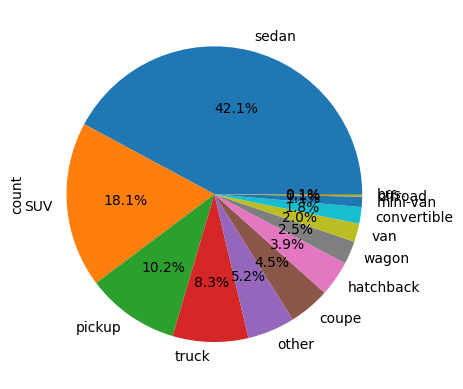

In [114]:
df['type'].value_counts().plot(kind='pie',autopct='%1.1f%%');

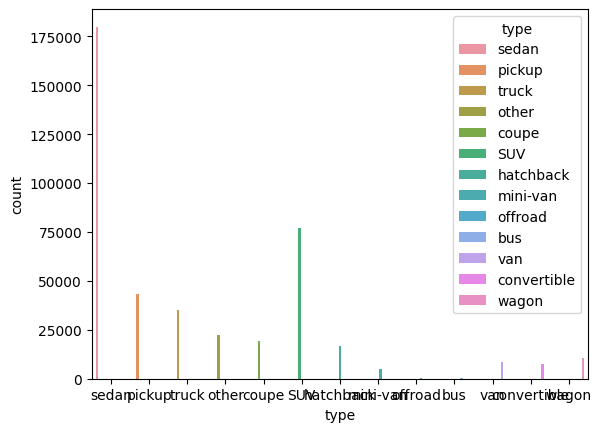

In [115]:
sns.countplot(x= 'type' , data =df , hue= 'type');

# What is the distribution of the number of cars according to title status?

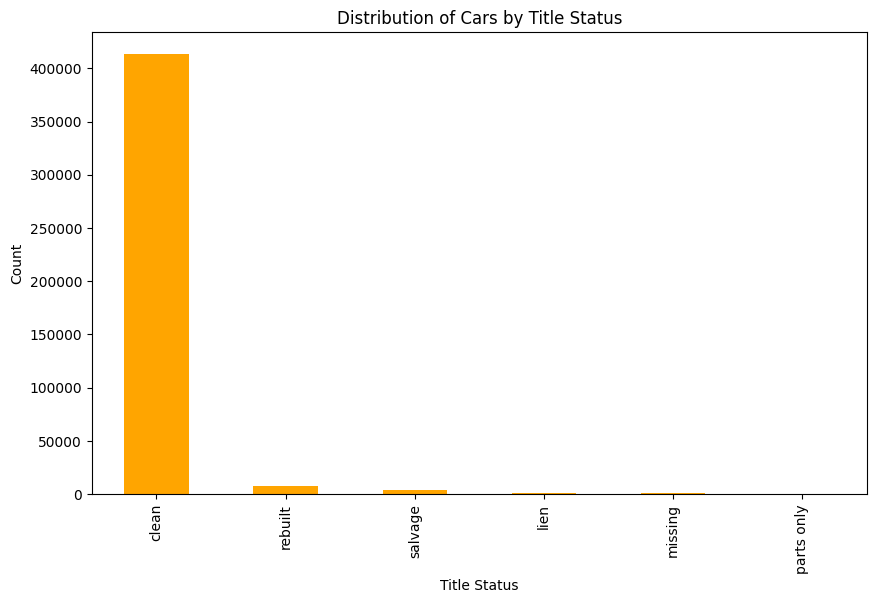

In [135]:
plt.figure(figsize=(10, 6))
df['title_status'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Cars by Title Status')
plt.xlabel('Title Status')
plt.ylabel('Count')
plt.show()


# What is the most common condition for cars?

In [136]:
most_common = df['condition'].mode()[0]
print(f"The most common case: {most_common}")

The most common case: good


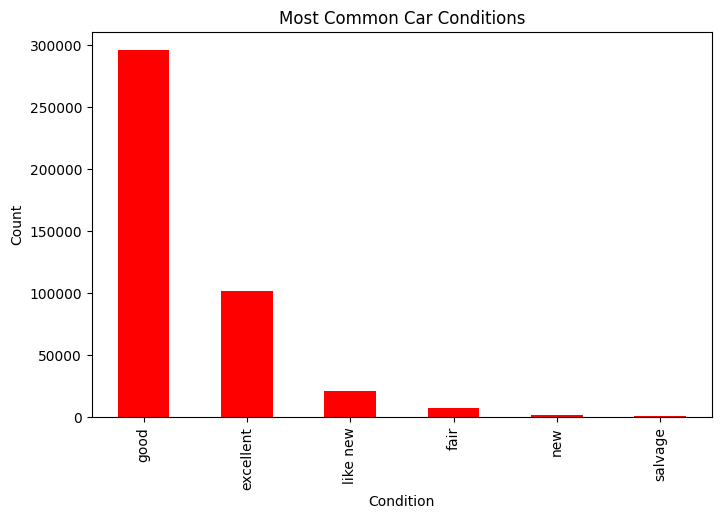

In [138]:
plt.figure(figsize=(8, 5))
df['condition'].value_counts().plot(kind='bar', color='red')
plt.title('Most Common Car Conditions')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

# What is the distribution of data over time?

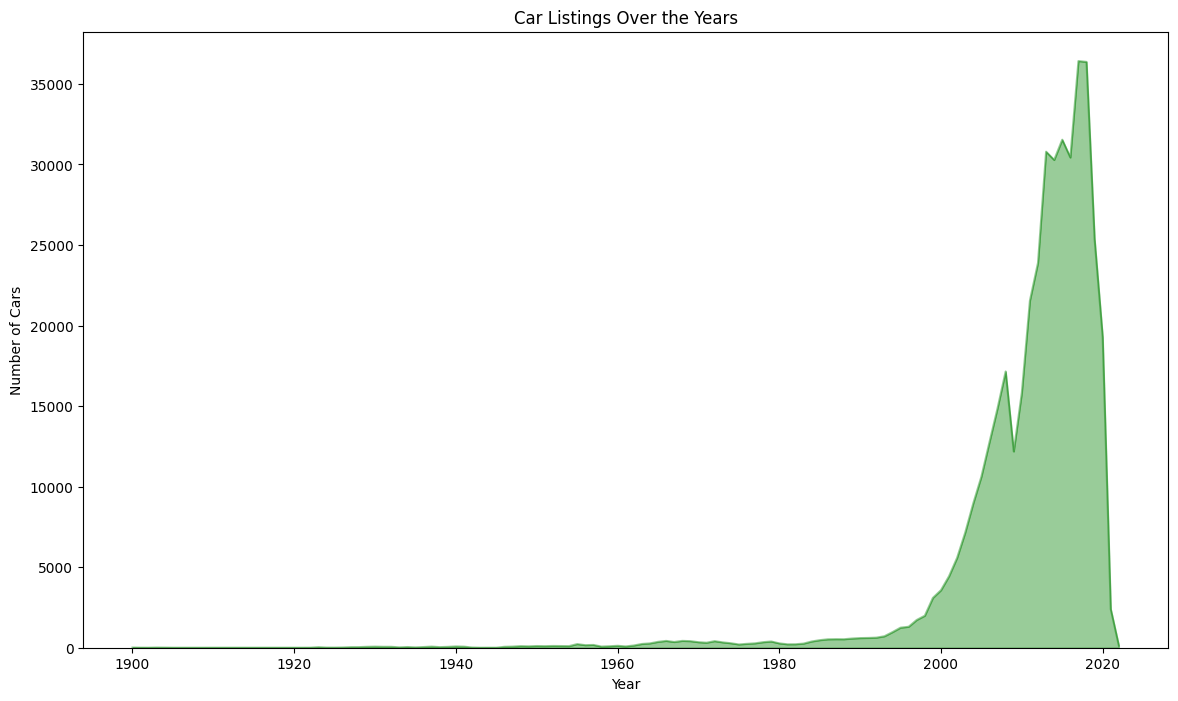

In [145]:
df['year'] = df['year'].astype(int)
yearly_distribution = df.groupby('year')['id'].count()

plt.figure(figsize=(14, 8))
yearly_distribution.plot(kind='area', color='green', alpha=0.4)
plt.title('Car Listings Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.show()


# What is the relationship between distance traveled and price?

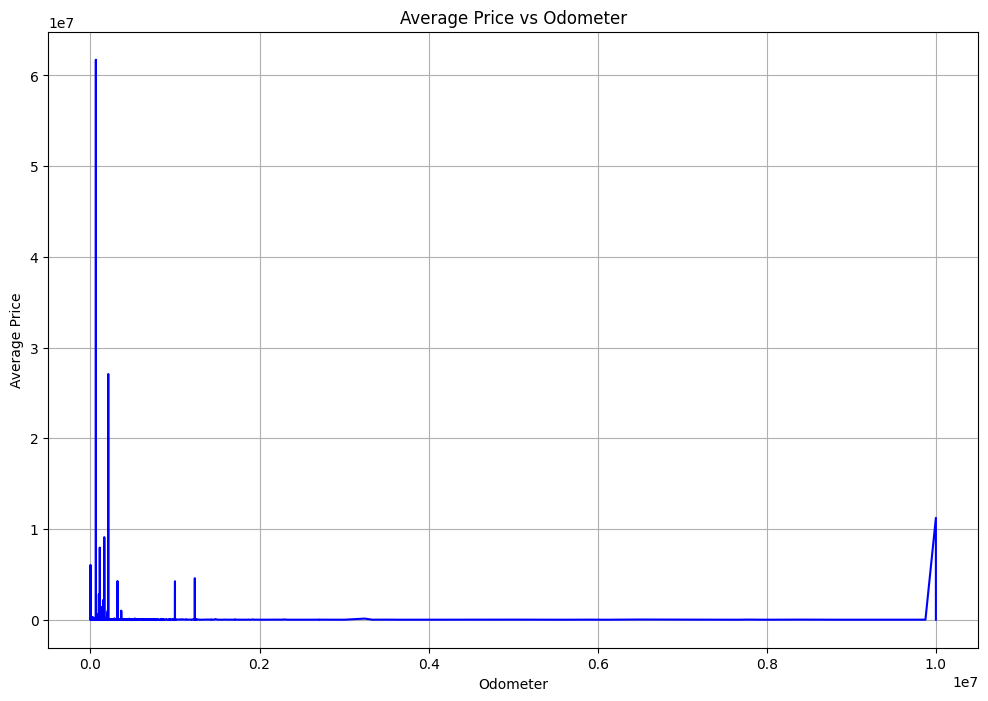

In [147]:
plt.figure(figsize=(12, 8))
df.groupby('odometer')['price'].mean().plot(kind='line', color='blue')
plt.title('Average Price vs Odometer')
plt.xlabel('Odometer')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


# How do prices compare between fuel types?

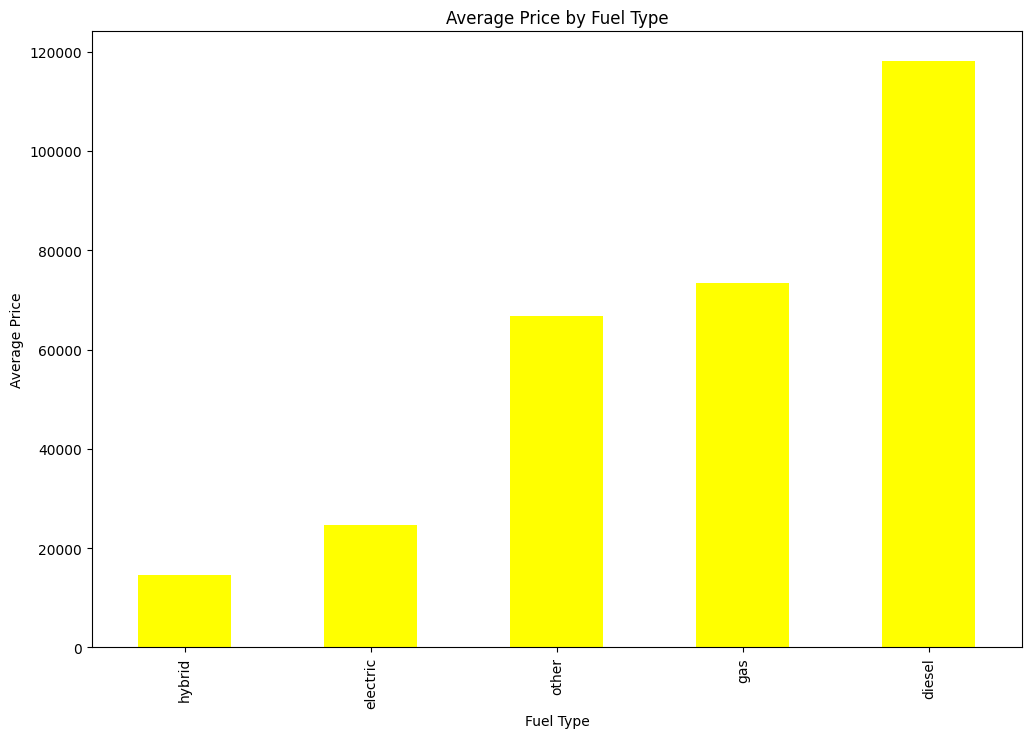

In [149]:
fuel_price_comparison = df.groupby('fuel')['price'].mean().sort_values()
plt.figure(figsize=(12, 8))
fuel_price_comparison.plot(kind='bar', color='yellow')
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.show()


# Thanks